# Imersão de Dados 04 - Pesquisa de Imóveis em São Paulo

# Aula 02

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [162]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

data = pd.read_csv( url )
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## Transformação dos Dados

#### Criando novas colunas

In [163]:
df_valores = data["Valor"].str.split( expand=True ).rename( columns={ 0: "Valor_sinal", 1: "Valor_real", 2: "Valor_tipo"})
df_valores.head()

,Valor_sinal,Valor_real,Valor_tipo
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None


In [164]:
# Convertendo a coluna Valor_real para float
valor_real_float = df_valores["Valor_real"].str.replace( ".", "" ).astype( 'float' )
valor_real_float.dtype

/tmp/ipykernel_5967/3234832733.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  valor_real_float = df_valores["Valor_real"].str.replace( ".", "" ).astype( 'float' )


dtype('float64')

In [165]:
df_valores["Valor_real"] = valor_real_float
df_valores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Valor_sinal  10008 non-null  object 
 1   Valor_real   10008 non-null  float64
 2   Valor_tipo   852 non-null    object 
dtypes: float64(1), object(2)
memory usage: 234.7+ KB


Tudo certo com essas novas colunas, agora vamos concatená-las no dataframe original.

In [166]:
data = pd.concat( [data, df_valores], axis=1 )
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real,Valor_tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None


#### Removendo os dados de imóveis de locação

In [167]:
imoveis_venda = data.loc[data["Valor_tipo"].isna()]
imoveis_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real,Valor_tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None


In [168]:
imoveis_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rua          6107 non-null   object 
 1   Bairro       9146 non-null   object 
 2   Cidade       9156 non-null   object 
 3   Metragem     9156 non-null   int64  
 4   Quartos      9156 non-null   int64  
 5   Banheiros    9156 non-null   int64  
 6   Vagas        9156 non-null   int64  
 7   Valor        9156 non-null   object 
 8   Valor_sinal  9156 non-null   object 
 9   Valor_real   9156 non-null   float64
 10  Valor_tipo   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


## DESAFIOS:
- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título e escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusões
- Pesquisar uma visualização para analisar os quartis, mediana e outliers

#### 1. Criar uma escala de valores em milhões

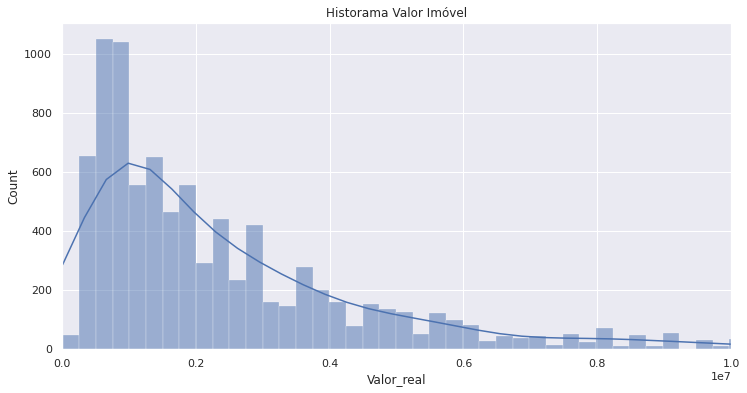

In [169]:
fig, ax = plt.subplots( figsize=(12, 6) )

ax = sns.histplot( data=imoveis_venda, x='Valor_real', kde=True )
ax.set_title( "Historama Valor Imóvel" )

plt.xlim( ( -50, 10000000 ) )
plt.show()

#### 2. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título e escala)

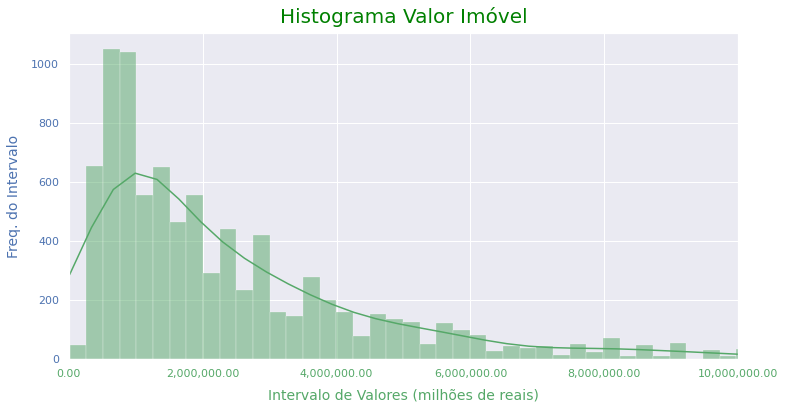

In [170]:
fig, ax = plt.subplots( figsize=(12, 6) )

ax = sns.histplot( data=imoveis_venda, x='Valor_real', kde=True, color='g' )
ax.set_xlabel( "Intervalo de Valores (milhões de reais)", color='g', fontsize=14, labelpad=10 )
ax.set_ylabel( "Freq. do Intervalo", color='b', fontsize=14, labelpad=10 )
ax.set_title( "Histograma Valor Imóvel", pad=10, fontsize=20, color='green' )
ax.tick_params( 'y', colors='b' )
ax.tick_params( 'x', colors='g' )
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xlim( ( -50, 10000000 ) )
plt.show()

#### 3. Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [185]:
valor_m1 = imoveis_venda["Valor_real"] / imoveis_venda["Metragem"]
imoveis_venda["Valor_m2"] = valor_m1

/tmp/ipykernel_5967/2084564205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_venda["Valor_m2"] = valor_m1


In [186]:
valor_real_sum = imoveis_venda.groupby( "Bairro" )["Valor_real"].sum()
metragem_sum = imoveis_venda.groupby( "Bairro" )["Metragem"].sum()
bairros_valor_m2 = valor_real_sum / metragem_sum

In [193]:
m2_por_bairro = bairros_valor_m2.sort_values( ascending=False ).reset_index()
m2_por_bairro.columns = ["Bairro", "Valor_m2"]
m2_por_bairro.head()

,Bairro,Valor_m2
0,Vila Guaca,80000.00
1,Jardim América,25417.48
2,Jardim Teresa,22884.32
3,Jardim Europa,20304.57
4,Vila Nova Conceição,17576.07


[]

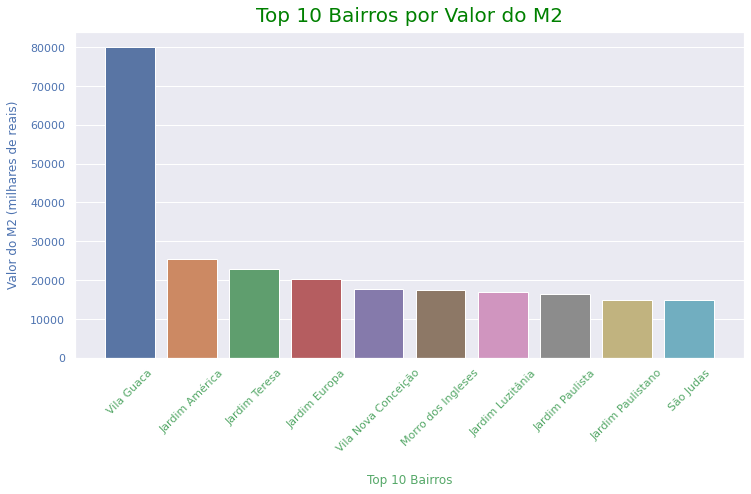

In [195]:
# Plotando em um Gráfico de Barras
fig, ax = plt.subplots( figsize=( 12, 6 ) )

ax = sns.barplot( data=m2_por_bairro[:10], x="Bairro", y="Valor_m2" )
ax.set_xlabel( "Top 10 Bairros", labelpad=20, color="g" )
ax.set_ylabel( "Valor do M2 (milhares de reais)", labelpad=10, color="b" )
ax.set_title( "Top 10 Bairros por Valor do M2", pad=10, fontsize=20, color='green' )
ax.tick_params( 'y', colors='b' )
ax.tick_params( 'x', colors='g', rotation=45 )

plt.plot()

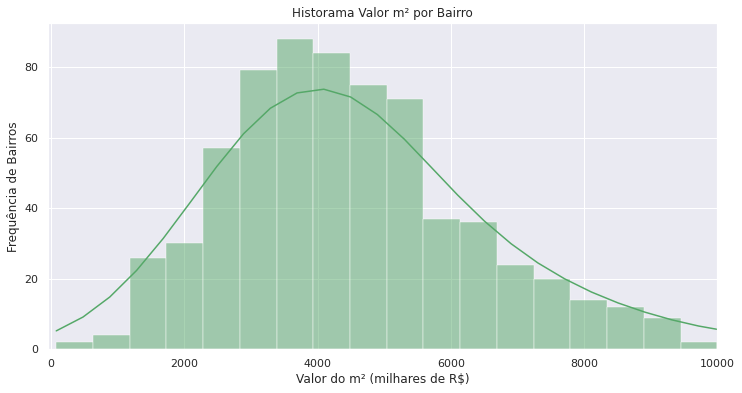

In [196]:
# Plottando em um Histograma
fig, ax = plt.subplots( figsize=( 12, 6 ) )

ax = sns.histplot( data=m2_por_bairro, x='Valor_m2', kde=True, color='g' )
ax.set_title( "Historama Valor m² por Bairro" )
ax.set_ylabel( "Frequência de Bairros" )
ax.set_xlabel( "Valor do m² (milhares de R$)" )

plt.xlim( ( -50, 10000 ) )
plt.show()

#### 4. Explorar as bibliotecas de visualizações e colocar as suas conclusões

##### Variável Numérica X Variável Numérica
###### Scatter Plot

[]

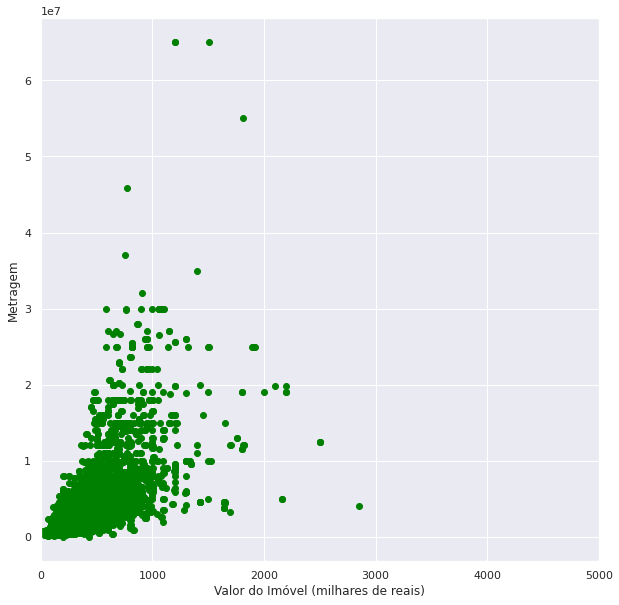

In [201]:
# Plottando um scatter plot
fig, ax = plt.subplots( figsize=( 10, 10 ) )

ax.scatter( data=imoveis_venda, x='Metragem', y='Valor_real', marker='o', color='green' )
ax.set_ylabel( 'Metragem' )
ax.set_xlabel( 'Valor do Imóvel (milhares de reais)' )

plt.xlim( ( 0, 5000 ) )
plt.plot()

Com este gráfico de dispersão, nós podemos analisar as relações entre duas variáveis numéricas, neste caso `Valor do Imóvel` no eixo X e `Metragem` no eixo Y. Podemos inferir, baseado na visualização acima que, existem certos valores discrepantes no dataset que precisam de posterior análise e validação para indentificar se são valores que devem ser removidos ou não, e que podemos dizer que as duas variáveis não possuem uma correlação forte entre ambas, já que não vimo uma linha reta formada pelos dados, mas sim dados espalhados que nos dizem que não há uma correlação forte.

##### Variável Categórica X Variável Numérica
###### BoxPlot

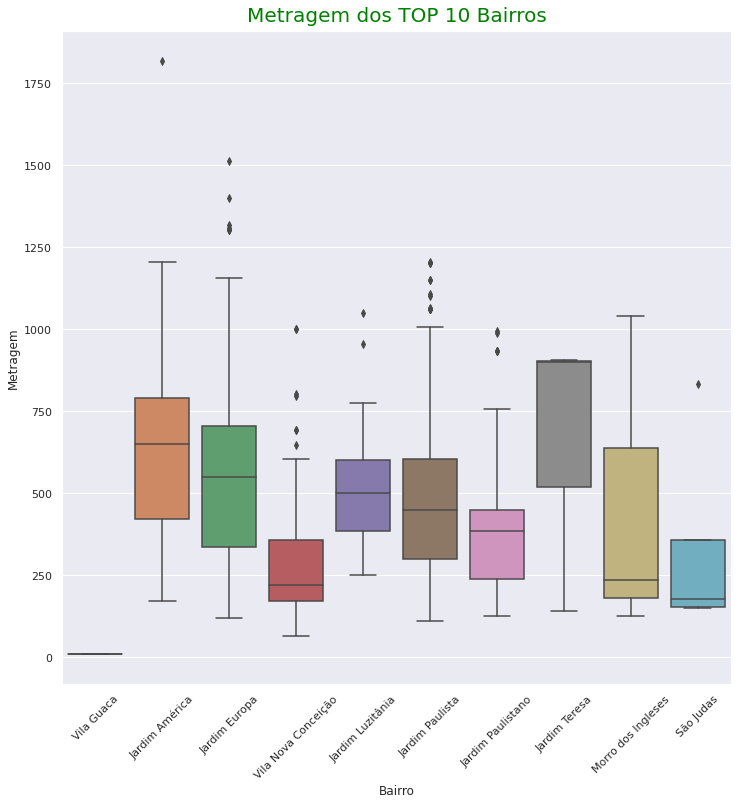

In [197]:
fig, ax = plt.subplots( figsize=( 12, 12 ) )

ax = sns.boxplot( data=imoveis_venda[imoveis_venda["Bairro"].isin(m2_por_bairro[:10].Bairro)] \
    .sort_values( by='Valor_m2', ascending=False ), x="Bairro", y="Metragem" )
ax.tick_params( axis='x', rotation=45)
ax.set_title( "Metragem dos TOP 10 Bairros", pad=10, fontsize=20, color='green' )

plt.show()

Analisando este boxplots, notamos de cara que o Bairro mais a esquerda, sendo este o que possue o maior valor para a variável `Metragem` se origina de uma dado discrepante, sendo um outlier que precisa ser validado se deve-se ou não excluí-lo do dataset. O restante dos Bairros nota-se também que o IQR (Interquantile Range) entre a maioria dos bairros é relativamente grande, além disso nota-se que no BoxPlot referente ao bairro *Jardim Teresa* a média não se encontra dentro do IQR, um caso que deve ser melhor analisado.

In [198]:
imoveis_venda[imoveis_venda["Bairro"] == "Jardim Teresa"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real,Valor_tipo,Valor_m2_metodo_1,Valor_m2_metodo_2,Valor_m2
4316,NaN,Jardim Teresa,São Paulo,900,6,8,8,R$ 22.000.000,R$,22000000.00,None,24444.44,NaN,24444.44
4419,NaN,Jardim Teresa,São Paulo,905,6,8,8,R$ 22.000.000,R$,22000000.00,None,24309.39,NaN,24309.39
4741,Rua João Vidal de Siqueira,Jardim Teresa,São Paulo,140,3,2,2,R$ 510.000,R$,510000.00,None,3642.86,NaN,3642.86


Existem apenas 3 entradas para o Bairro *Jardim Teresa*, sendo as duas primeiras muito semelhantes, provavelmente foram resultado de entradas duplicadas e precisam serem investigadas mais ainda. Tendo a 3° e última entrada uma *Metragem* bem inferior das outras, explicando o porque da média não estar dentro do corpo do BoxPlot.

#### 5. Pesquisar uma visualização para analisar os quartis, mediana e outliers

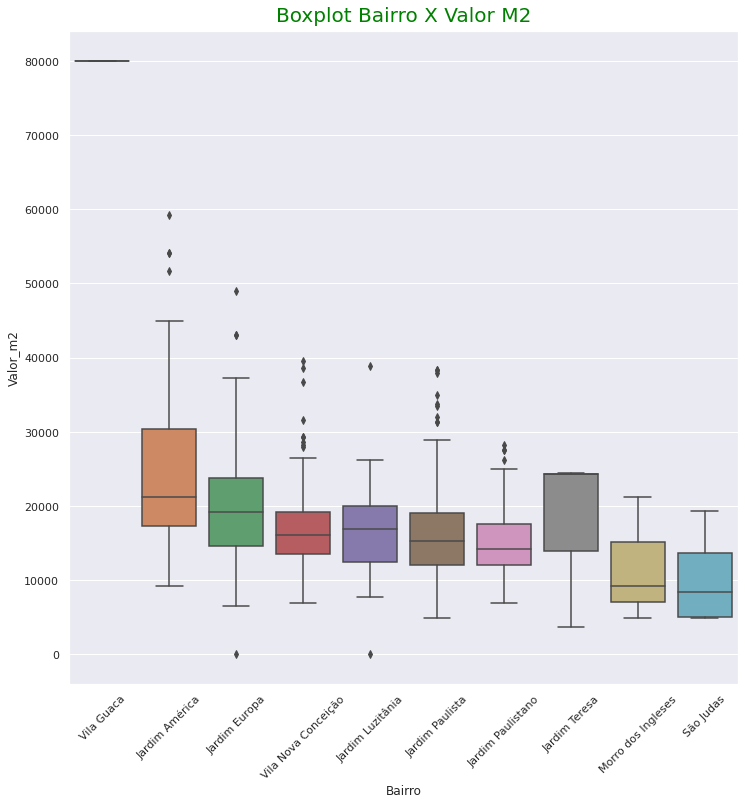

In [200]:
fig, ax = plt.subplots( figsize=( 12, 12 ) )

ax = sns.boxplot( data=imoveis_venda[imoveis_venda["Bairro"].isin(m2_por_bairro[:10].Bairro)] \
    .sort_values( by='Valor_m2', ascending=False ), x="Bairro", y="Valor_m2" )
ax.tick_params( axis='x', rotation=45)
ax.set_title( "Boxplot Bairro X Valor M2", pad=10, fontsize=20, color='green' )

plt.show()